<a href="https://colab.research.google.com/github/BayramovaNazrin/test1/blob/main/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data


In [3]:
!git clone https://github.com/BayramovaNazrin/test1.git
%cd /content/test1

Cloning into 'test1'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 133 (delta 50), reused 35 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 3.10 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/test1


In [5]:
import sys
sys.path.append('/content/test1')

from load_data import load_data
features, edges, classes, merged_df = load_data()

# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [49]:
import joblib
y_test = joblib.load('/content/drive/MyDrive/test1_artifacts/y_test.pkl')
y_train = joblib.load('/content/drive/MyDrive/test1_artifacts/y_train.pkl')
X_test = joblib.load('/content/drive/MyDrive/test1_artifacts/X_test.pkl')
test_pred = joblib.load('/content/drive/MyDrive/test1_artifacts/test_pred.pkl')
clf = joblib.load('/content/drive/MyDrive/test1_artifacts/clf.pkl')
X_train = joblib.load('/content/drive/MyDrive/test1_artifacts/X_train.pkl')
feature_cols = joblib.load('/content/drive/MyDrive/test1_artifacts/feature_columns.pkl')
embeddings = joblib.load('/content/drive/MyDrive/test1_artifacts/embeddings.pkl')
RandomForestClassifier = joblib.load('/content/drive/MyDrive/test1_artifacts/RandomForestClassifier.pkl')

# *Store all images*

In [14]:
import os

save_dir = "/content/test1/visuals/evaluation"
os.makedirs(save_dir, exist_ok=True)

# Confusion Matrix (Node2Vec + RF)

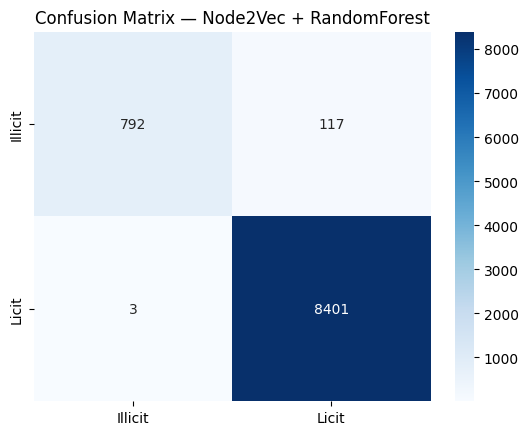

In [15]:
cm = confusion_matrix(y_test, test_pred, labels=[1, 2])
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Illicit', 'Licit'],
    yticklabels=['Illicit', 'Licit']
)
plt.title("Confusion Matrix — Node2Vec + RandomForest")
plt.savefig(f"{save_dir}/confusion_matrix_node2vec_rf.png", dpi=300, bbox_inches="tight")
plt.show()


# **Model Comparison Table**

In [16]:
results = {
    "Model": ["RandomForest", "SVM", "Node2Vec + RF", "GraphSAGE", "Tuned GraphSAGE"],
    "Accuracy": [0.9880, 0.9548, 0.9870, 0.9671, 0.9656],
    "F1-score (Illicit)": [0.9371, 0.7994, 0.9290, 0.7037, 0.7099],
    "Precision (Illicit)": [0.9575, 0.7050, 0.9950, 0.8468, 0.7859],
    "Recall (Illicit)": [0.9175, 0.9230, 0.8713, 0.6020, 0.6473],
    "PR-AUC": [0.9762, np.nan, 0.9794, 0.3739, 0.6811],
    "ROC-AUC": [0.9953, np.nan, 0.9956, 0.8854, 0.9008]
}
df_results = pd.DataFrame(results)
display(df_results)


,Model,Accuracy,F1-score (Illicit),Precision (Illicit),Recall (Illicit),PR-AUC,ROC-AUC
0,RandomForest,0.9880,0.9371,0.9575,0.9175,0.9762,0.9953
1,SVM,0.9548,0.7994,0.7050,0.9230,NaN,NaN
2,Node2Vec + RF,0.9870,0.9290,0.9950,0.8713,0.9794,0.9956
3,GraphSAGE,0.9671,0.7037,0.8468,0.6020,0.3739,0.8854
4,Tuned GraphSAGE,0.9656,0.7099,0.7859,0.6473,0.6811,0.9008


# **Radar (Spider) Plot for Metrics**

             Model  Accuracy  F1-score (Illicit)  Precision (Illicit)  \
0     RandomForest    0.9880              0.9371               0.9575   
1              SVM    0.9548              0.7994               0.7050   
2    Node2Vec + RF    0.9870              0.9290               0.9950   
3        GraphSAGE    0.9671              0.7037               0.8468   
4  tuned GraphSAGE    0.9656              0.7099               0.7859   

   Recall (Illicit)  PR-AUC  ROC-AUC  
0            0.9175  0.9762   0.9953  
1            0.9230     NaN      NaN  
2            0.8713  0.9794   0.9956  
3            0.6020  0.3739   0.8854  
4            0.6473  0.6811   0.9008  


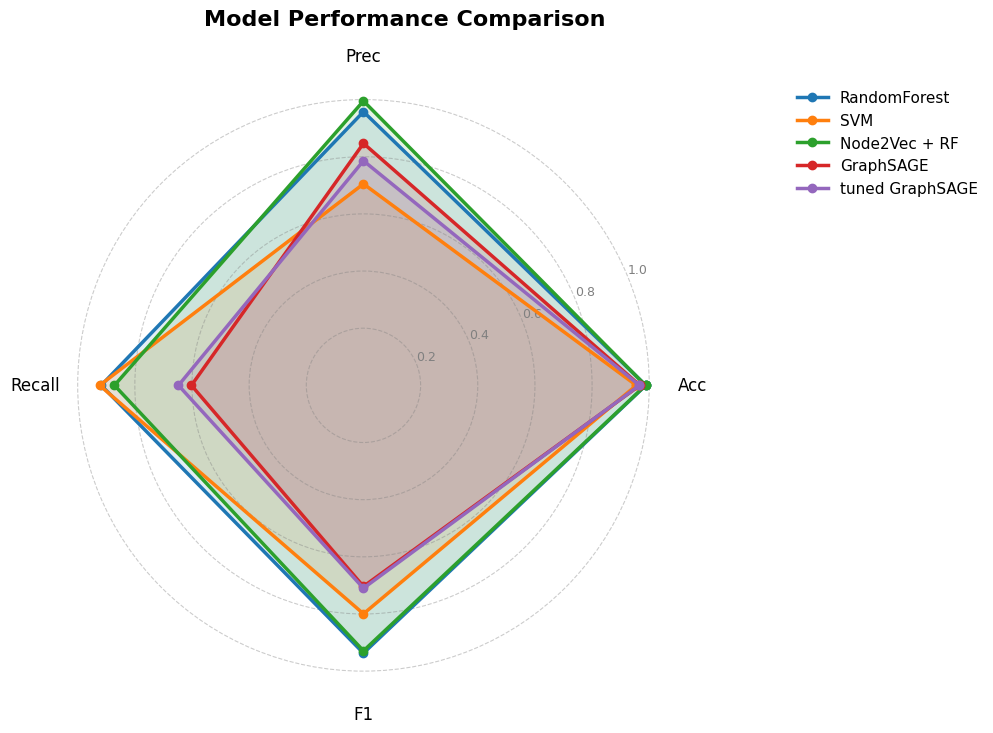

In [23]:
import numpy as np
import matplotlib.pyplot as plt


results = {
    "Model": ["RandomForest", "SVM", "Node2Vec + RF", "GraphSAGE", "tuned GraphSAGE"],
    "Accuracy": [0.9880, 0.9548, 0.9870, 0.9671, 0.9656],
    "F1-score (Illicit)": [0.9371, 0.7994, 0.9290, 0.7037, 0.7099],
    "Precision (Illicit)": [0.9575, 0.7050, 0.9950, 0.8468, 0.7859],
    "Recall (Illicit)": [0.9175, 0.9230, 0.8713, 0.6020, 0.6473],
    "PR-AUC": [0.9762, np.nan, 0.9794, 0.3739 , 0.6811],
    "ROC-AUC": [0.9953, np.nan, 0.9956, 0.8854, 0.9008]
}

df_results = pd.DataFrame(results)
print(df_results)

import numpy as np
import matplotlib.pyplot as plt

# Short labels (horizontal, no rotation)
short_labels = ["Acc", "Prec", "Recall", "F1"]
num_vars = len(short_labels)

# Compute angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Create plot
fig, ax = plt.subplots(figsize=(8, 7.5), subplot_kw=dict(polar=True))

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


# Plot each model
for i, (idx, row) in enumerate(df_results.iterrows()):
    values = [
        row["Accuracy"],
        row["Precision (Illicit)"],
        row["Recall (Illicit)"],
        row["F1-score (Illicit)"]
    ]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2.5, label=row['Model'], color=colors[i], markersize=6)
    ax.fill(angles, values, alpha=0.12, color=colors[i])

#  Fix clipping: extend radius slightly
ax.set_ylim(0, 1.08)

# Y-ticks only up to 1.0 (visually, 1.0 is still the "max")
yticks = [0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.1f}" for y in yticks], color='gray', fontsize=9)
ax.grid(True, linestyle='--', alpha=0.4, color='gray')

# Hide default angular ticks
ax.set_xticks([])

# Remove outer spine
ax.spines['polar'].set_visible(False)

# Place labels outside the padded circle
label_radius = 1.15

for i, label in enumerate(short_labels):
    angle_rad = angles[i]
    ax.text(
        angle_rad,
        label_radius,
        label,
        ha='center',
        va='center',
        fontsize=12,
        fontweight='medium'
    )

# Title
fig.suptitle(
    "Model Performance Comparison",
    fontsize=16,
    fontweight='bold',
    x=0.5,
    y=0.97,
    ha='center'
)

# Legend
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.18, 1.0),
    frameon=False,
    fontsize=11
)

# Final layout
plt.tight_layout()
plt.subplots_adjust(top=0.88, right=0.85)
plt.savefig(f"{save_dir}/radar_plot.png", dpi=300, bbox_inches="tight")
plt.show()

# **Feature Importances**

In [30]:
# --- Reconstruct feature names for Node2Vec + Original features ---
n_embed = embeddings.shape[1]        # typically 128
n_orig = features.shape[1] - 1       # exclude txId column

embed_cols = [f"emb_{i}" for i in range(n_embed)]
orig_cols = features.columns[1:].tolist()
all_cols = embed_cols + orig_cols

# Convert NumPy array back to DataFrame with feature names
X_train_df = pd.DataFrame(X_train, columns=all_cols)

# Compute feature importances
imp_df = pd.DataFrame({
    "Feature": X_train_df.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

<Figure size 1000x800 with 0 Axes>

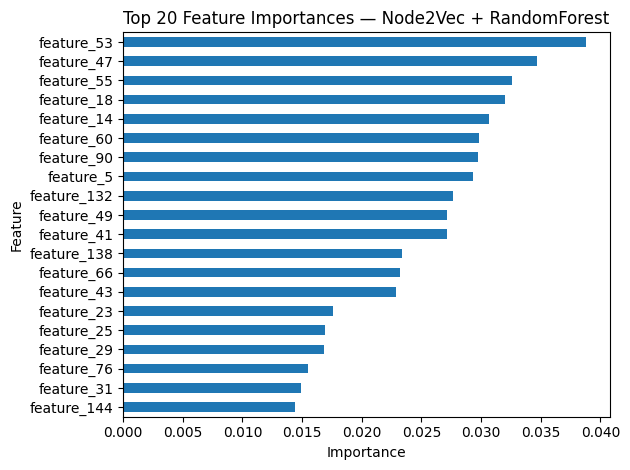

In [35]:
plt.figure(figsize=(10, 8))
imp_df.head(20).iloc[::-1].plot(
    kind='barh',
    x='Feature',
    y='Importance',
    color='#1f77b4',
    legend=False
)
plt.title("Top 20 Feature Importances — Node2Vec + RandomForest")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig(f"{save_dir}/feature_importances_node2vec_rf.png", dpi=300)
plt.show()

# **Least Important Features**

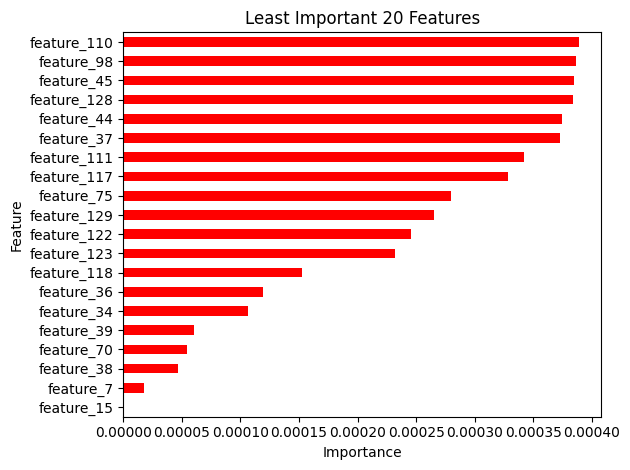

In [36]:
imp_df.tail(20).iloc[::-1].plot(kind='barh', x='Feature', y='Importance', color='red', legend=False)
plt.title("Least Important 20 Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig(f"{save_dir}/least_important_features.png", dpi=300)
plt.show()

# **Feature Subset Retraining**

In [38]:
# Sort features by importance and select top 20
top_features = imp_df.sort_values(by="Importance", ascending=False).head(20)["Feature"].tolist()

# feature names → column indices
feature_to_index = {feat: idx for idx, feat in enumerate(X_train_df.columns)}

# Get their indices
top_indices = [feature_to_index[feat] for feat in top_features]

In [50]:
X_train_selected = X_train[:, top_indices]
X_test_selected = X_test[:, top_indices]

rf_selected = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    random_state=42
)
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

# Check images

In [67]:
!ls visuals/evaluation

confusion_matrix_node2vec_rf.png     least_important_features.png
feature_importances_node2vec_rf.png  radar_plot.png
